In [44]:
#Import libraries
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import csv
import numpy as np
import os
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import scipy
%matplotlib inline



In [45]:
#Read in Files
contacts= pd.read_csv('/Users/jermainemarshall/Downloads/Airbnb_take_home/contacts.csv')
listings= pd.read_csv('/Users/jermainemarshall/Downloads/Airbnb_take_home/listings.csv')
users= pd.read_csv('/Users/jermainemarshall/Downloads/Airbnb_take_home/users.csv')

#Variable Declarations
bins_guest_host = [-1, 10, 25, 50, 100,1000]
bin_interact = [-1, 10, 25, 50, 100]
bin_message = [-1, 50, 100,150, 200, 250, 300,400,500,700,1000]
labels_guest_host = [1,2,3,4,5]
labels_interact = [1,2,3,4]
labels_message = [1,2,3,4,5,6,7,8,9,10]

# #Function Calls

In [46]:
def convert_cat_codes(df,new_column, column):
    """Convert String Columns To Cat Codes"""
    df[column]= df[column].astype('category')
    df[new_column] = df[column].cat.codes
    #df.column.m_interactions.corr(contacts.contact_channel_first)
    

def binning_variables(bins, labels, df, new_column,column):
    """Convert Wide Distribution Variables To Bins"""
    df[new_column]= pd.cut(df[column], bins=bins, labels=labels)

# Correlations Between Attributes

/Users/jermainemarshall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/jermainemarshall/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/jermainemarshall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

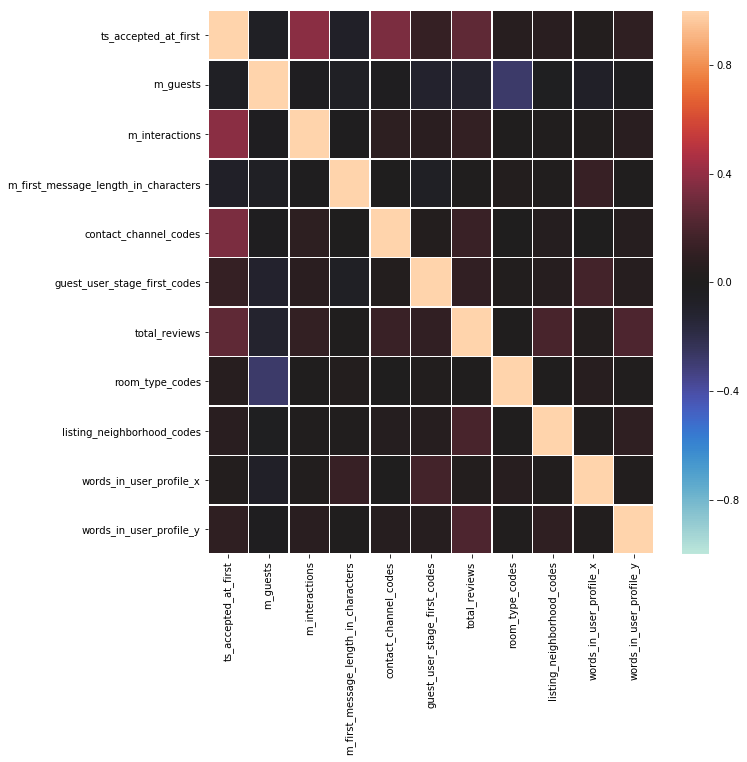

In [47]:
if __name__ == '__main__':
    
    #Convert columns to cat codes
    convert_cat_codes(contacts,'contact_channel_codes', 'contact_channel_first')
    convert_cat_codes(contacts,'guest_user_stage_first_codes', 'guest_user_stage_first')
    convert_cat_codes(listings,'room_type_codes', 'room_type')
    convert_cat_codes(listings,'listing_neighborhood_codes', 'listing_neighborhood')
    
    
    #Merge columns together and select those whose country is Brazil Only
    df = contacts.merge(listings, on= "id_listing_anon", how= 'left')
    df_users2= users[['id_user_anon', 'country', 'words_in_user_profile']].copy()
    users = users.rename(columns={'id_user_anon': 'id_guest_anon'})
    df_users2 = df_users2.rename(columns={'id_user_anon': 'id_host_anon'})
    df= df.merge(users, on= "id_guest_anon", how= 'left')
    df= df.merge(df_users2, on= "id_host_anon", how= 'left')
    df_Brazil= df.query("country_x=='BR' or country_y=='BR'")
    
    #Bin Variables
    binning_variables(bins_guest_host,labels_guest_host, df_Brazil, 'binned_guest', 'words_in_user_profile_x')
    binning_variables(bins_guest_host,labels_guest_host, df_Brazil, 'binned_host', 'words_in_user_profile_y')
    binning_variables(bin_interact,labels_interact, df_Brazil, 'binned_m_interactions', 'm_interactions')
    binning_variables(bin_message,labels_message, df_Brazil, 'binned_m_messages', 'm_first_message_length_in_characters')
    
    # Fill Null with 0 Non-null with 1 to see if the host accepted
    df_Brazil.loc[df_Brazil['ts_accepted_at_first'].notnull(), 'ts_accepted_at_first'] = 1
    df_Brazil['ts_accepted_at_first'] = df_Brazil.ts_accepted_at_first.fillna(0)
    
    
    #Plot Pearson Correlation Results minus ids
    corrlistings=df_Brazil.iloc[:,3:].corr()
    fig, ax = plt.subplots(figsize=(10,10)) 
    sns.heatmap(corrlistings, vmin= -1, vmax=1,linewidths=.5,  center=0, ax=ax)
    
    #Group hosts that accepted or did not accept with the contact channel
    df_Brazil.groupby(["ts_accepted_at_first", "contact_channel_first"]).size().reset_index(name="Co-occur")
    
    #Group neighborhoods with hosts that did or did not accept 
    df_grouped=df_Brazil.groupby(["listing_neighborhood", 'ts_accepted_at_first']).size().reset_index(name="Co-occur")
    df_grouped.loc[df_grouped['listing_neighborhood'] == 'Lagoa']



    
    